<a href="https://colab.research.google.com/github/rajarya97/ANN_sol/blob/main/transportation_mode_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
import glob
from skimage import io
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split
import io

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_path = '/content/drive/MyDrive/transportation_mode_detection/cleaned.csv'

In [106]:
df1 = pd.read_csv('/content/drive/MyDrive/transportation_mode_detection/cleaned.csv')

##Q.1 DATA READING

In [107]:
df1.head()

,user,timestamp,x,y,z,class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus


In [108]:
df1.shape

(5653053, 6)

In [8]:
df1.tail()

,user,timestamp,x,y,z,class
5653048,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,2019-09-13 17:04:31,8.25,0.47,1.41,bike
5653049,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,2019-09-13 17:04:31.900000,12.28,2.07,1.87,bike
5653050,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,2019-09-13 17:04:31,9.20,3.39,-1.80,bike
5653051,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,2019-09-13 17:04:31,9.88,4.19,-1.29,bike
5653052,faae5be800be2dfa897eea0bd2e5988cd53c4ec0,2019-09-13 17:04:32,10.91,1.49,3.05,bike


In [109]:
df1['class'].value_counts()

car       2937546
bus       1349107
walk       870434
bike       385114
train      102155
e-bike       8697
Name: class, dtype: int64

In [10]:
df1['class'].describe()

count     5653053
unique          6
top           car
freq      2937546
Name: class, dtype: object

In [11]:
df1['x'].describe()

count    5.653053e+06
mean     1.499442e+00
std      4.657316e+00
min     -7.321000e+01
25%     -1.300000e+00
50%      7.100000e-01
75%      4.650000e+00
max      7.840000e+01
Name: x, dtype: float64

In [12]:
df1['y'].describe()

count    5.653053e+06
mean     1.483885e+00
std      6.262899e+00
min     -7.840000e+01
25%     -1.790000e+00
50%      2.130000e+00
75%      6.260000e+00
max      7.834000e+01
Name: y, dtype: float64

In [13]:
df1['z'].describe()

count    5.653053e+06
mean     2.484874e+00
std      5.800348e+00
min     -7.844000e+01
25%     -9.600000e-01
50%      3.500000e+00
75%      7.320000e+00
max      7.840000e+01
Name: z, dtype: float64

In [14]:
df1['timestamp'].describe()

count                        5653053
unique                       3856262
top       2019-09-12 21:18:09.600000
freq                              95
Name: timestamp, dtype: object

In [15]:
df1['user'].describe()

count                                      5653053
unique                                          32
top       a59868c6eb3645eedbb343ce8c336ec6f2ef2324
freq                                        673366
Name: user, dtype: object

**Creating pie chart**

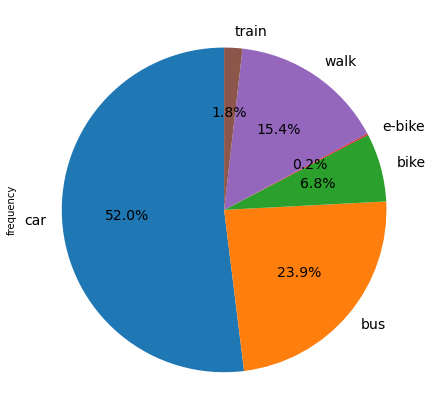

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
# from pandas.tools.plotting import table

# sample data
raw_data = {'class_name': ['car', 'bus', 'bike', 'e-bike', 'walk', 'train'],
        'frequency': [2937546, 1349107, 385114, 8697, 870434, 102155]}
df = pd.DataFrame(raw_data, columns = ['class_name', 'frequency'])
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'frequency', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['class_name'], legend = False, fontsize=14)

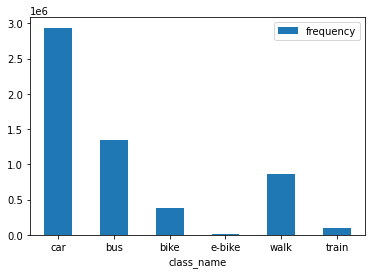

In [111]:
# df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df.plot.bar(x='class_name', y='frequency', rot=0)

Below cells contains the number of unique users

In [112]:
user = df1['user'].unique()
user

array(['a2d80ed662f34d32951eb1c6ed076c313e358b73',
       'a526f3566e9c9024dfa7378eb4291d787a09fd37',
       'a59868c6eb3645eedbb343ce8c336ec6f2ef2324',
       'a92dee88f61123f923dccec01eeecf1a81953b36',
       'ac4c17afeb69b39169eb301ab592696a8f353976',
       'adaaae1a67ea9e43abd60ba945eccda0cb8821e0',
       'b138d165100ef60bc793cac143742eb5aea4d6ba',
       'b45157069942d01310c3e7b74034166717bb25f9',
       'b7b165e5637b5a0226068d907748f4bbfc61a320',
       'c453226e3616ae821cdcb38f38481c2a20f2482f',
       'c5702d34b238fe68683f818e82cd3a3cd8a16366',
       'ca7950f223a8037b897d0547075dc138f9e43b20',
       'cace4ec0999436917986b4fa6e9317262c897bc2',
       'cbde60baea002b694ecf2a3ff2d95be16b00efe1',
       'ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c',
       'd429974540bfd38c3367fe9f0c8682775ff4fa18',
       'd7a1230d94f91a32cc079809748e52e8a4a6a22f',
       'd7dd12d83c81574137f858034b99f4cc83ab0718',
       'd8c047eaaee204b7b5cd71e2d67308b87b038ed3',
       'dc0bdce306ec3b624fe0e6e

In [19]:
##No. of unique users
user.shape                              

(32,)

##Q2 UNIQUE SEQUENCE

In [333]:
import time

In [351]:
start = time.time()

**Shifting and making copy of column of user, class and timestamp then takig the difference between shifted timestamp and original timestamp for checking 10 sec interval.**

In [352]:
df1['shifted_user'] = df1['user'].shift(1, axis = 0)

In [353]:
df1['shifted_class'] = df1['class'].shift(1, axis = 0)

In [354]:
df1['shifted_ts'] = df1['timestamp'].shift(1, axis = 0)

In [355]:
df1['timestamp'] = df1['timestamp'].astype('datetime64[s]')
df1['shifted_ts'] = df1['shifted_ts'].astype('datetime64[s]')

In [356]:
df1['difference'] = ((df1['timestamp']) - (df1['shifted_ts']))/np.timedelta64(1,'s')

**Sequence will change if user changes or mode changes or time interval will be greater than 10 sec. Saving results coming from this into a new column named updated.**

In [357]:
df1['updated'] = (df1['user'] != df1['shifted_user']) | (df1['class'] != df1['shifted_class']) | (df1['difference']>10)

In [358]:
df1['updated'].sum()

3378

In [30]:
#df1['updated']

In [359]:
df1['updated_shift'] = df1['updated'].shift(1, axis = 0)

**Using the groupby function and displaying the number of unique sequences present for each transportation mode for each user**

In [360]:
ro = df1.groupby(['user', 'class']).updated.sum()

In [361]:
pd.set_option('display.max_rows',None, 'display.max_columns',None)

**Below cell contains the number of unique sequences present for each transportation mode for
each user:**

In [362]:
ro

user                                      class 
a2d80ed662f34d32951eb1c6ed076c313e358b73  bus        12
a526f3566e9c9024dfa7378eb4291d787a09fd37  car        13
                                          walk       19
a59868c6eb3645eedbb343ce8c336ec6f2ef2324  bike       33
                                          bus        18
                                          car        63
                                          walk       10
a92dee88f61123f923dccec01eeecf1a81953b36  bus         3
ac4c17afeb69b39169eb301ab592696a8f353976  car        20
                                          walk       58
adaaae1a67ea9e43abd60ba945eccda0cb8821e0  bus        20
                                          car        17
                                          walk        9
b138d165100ef60bc793cac143742eb5aea4d6ba  car         9
b45157069942d01310c3e7b74034166717bb25f9  car         3
                                          walk        2
b7b165e5637b5a0226068d907748f4bbfc61a320  car       191

In [363]:
end = time.time()

In [364]:
print(end - start)                                                              ##printing time in running Q.2

23.497427940368652


##Q.3 Time window partition

In [365]:
start1 = time.time()

In [366]:
# df1['updated2'] = (df1['updated'] != df1['updated_shift']) | (df1['difference']>5)
df1['seq'] = df1['updated'].cumsum(axis = 0, skipna = True)                     ## Making a new coloumn which will contains cummulative sum of updated coloumn

In [367]:
ro2 = df1.groupby(['timestamp', 'seq']).updated.max()

In [368]:
pd.set_option('display.max_rows',None, 'display.max_columns',None)

In [ ]:
ro2

**Taking minimum time of each seq and storing it in a new column named min_t**

In [369]:
df1['min_t'] = df1.groupby('seq').timestamp.transform('min')

**Sort of normalization of actual of timestamp by substracting the min_t from it**

In [370]:
df1['t_needed'] = (df1['timestamp'] - df1['min_t'])/np.timedelta64(1,'s')

In [371]:
# df1['t_needed'] = df1['t_needed']//5
df1['t_needed'].shape

(5653053,)

**This function is for giving each partition its particular index**

In [372]:
def partition(t1,t2):
  return str(t1)+'#'+str(int(t2/5))

**Implementing partition index function on partition window function**

In [373]:
# df1['t_parted'] = list(map(partition,df1['min_t'],df1['t_needed']))
df1['t_parted'] = np.vectorize(partition)(df1['seq'],df1['t_needed'])

In [374]:
df1['t_parted'].nunique()

40458

In [375]:
ro3 =  df1.groupby(['user', 'class']).t_parted.nunique()

In [51]:
# ro4 =  df1.groupby(['user', 'class']).t_parted.sum()

In [376]:
pd.set_option('display.max_rows',None, 'display.max_columns',None)

In [377]:
ro3

user                                      class 
a2d80ed662f34d32951eb1c6ed076c313e358b73  bus         34
a526f3566e9c9024dfa7378eb4291d787a09fd37  car       1542
                                          walk       298
a59868c6eb3645eedbb343ce8c336ec6f2ef2324  bike       565
                                          bus       3853
                                          car       2083
                                          walk       824
a92dee88f61123f923dccec01eeecf1a81953b36  bus        729
ac4c17afeb69b39169eb301ab592696a8f353976  car         62
                                          walk       479
adaaae1a67ea9e43abd60ba945eccda0cb8821e0  bus       1156
                                          car        533
                                          walk       153
b138d165100ef60bc793cac143742eb5aea4d6ba  car        415
b45157069942d01310c3e7b74034166717bb25f9  car        428
                                          walk        74
b7b165e5637b5a0226068d907748f4bbfc61a32

In [378]:
ro3.to_frame()

t_parted
user                                     class           
a2d80ed662f34d32951eb1c6ed076c313e358b73 bus           34
a526f3566e9c9024dfa7378eb4291d787a09fd37 car         1542
                                         walk         298
a59868c6eb3645eedbb343ce8c336ec6f2ef2324 bike         565
                                         bus         3853
                                         car         2083
                                         walk         824
a92dee88f61123f923dccec01eeecf1a81953b36 bus          729
ac4c17afeb69b39169eb301ab592696a8f353976 car           62
                                         walk         479
adaaae1a67ea9e43abd60ba945eccda0cb8821e0 bus         1156
                                         car          533
                                         walk         153
b138d165100ef60bc793cac143742eb5aea4d6ba car          415
b45157069942d01310c3e7b74034166717bb25f9 car          428
                                         walk          74
b7b165e5637b5a0226068d907748f4bbfc61a320 car         2131
                                         walk         203
c453226e3616ae821cdcb38f38481c2a20f2482f bike         501
                                         bus         1467
c5702d34b238fe68683f818e82cd3a3cd8a16366 bike         203
                                         bus          198
                                         walk        1239
ca7950f223a8037b897d0547075dc138f9e43b20 walk          64
cace4ec0999436917986b4fa6e9317262c897bc2 car         1150
cbde60baea002b694ecf2a3ff2d95be16b00efe1 bus          413
ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c bus          447
                                         car          505
d429974540bfd38c3367fe9f0c8682775ff4fa18 bus          519
                                         car          919
                                         walk         101
d7a1230d94f91a32cc079809748e52e8a4a6a22f bike         368
                                         train        418
                                         walk          80
d7dd12d83c81574137f858034b99f4cc83ab0718 car          673
d8c047eaaee204b7b5cd71e2d67308b87b038ed3 car         1761
                                         walk         163
dc0bdce306ec3b624fe0e6ecd1ffbd82cb970120 bike         573
                                         car          147
                                         walk          36
dd82e3df4bebc74ed6b67877be79e29f401c16a3 car          938
                                         walk         236
dde95e125d89843f7032baa734ee4d34ec775aaf bus           34
                                         car           42
                                         walk          50
de9892b879c83ea3d24fb4560873107cc4e86d48 car          923
                                         walk         336
dfcfc0404691b73b69884073159f90843f2ac35b bus          439
                                         car         1267
                                         walk         794
e429a95c532f1117130c11e4a18379d84fa4ffa9 bus          619
                                         car          184
eb9e7854290fd6ea9ebaf448b640fc1f1dbeb076 bus          357
                                         train        158
                                         walk         196
ecfb0929250fb6dda66a4065441230ab27f094e5 car         1027
                                         e-bike        79
                                         train         21
ed623d28c1e0071632a6110b8f8ed93f8af78b99 bus           71
                                         car         2172
                                         walk          16
f1b7331b66e404c11eebb22933e733117bbb12c9 bike         393
                                         car          776
                                         walk         197
f5edd999397145a2ec1b244226fc83f99631760c bus          302
                                         walk         118
f7ae1ce141c26db40ea8b090fb568a0c965310aa car          289
faae5be800be2dfa897eea0bd2e5988cd53c4ec0 bike  

In [379]:
df1['seq'].unique()

array([   1,    2,    3, ..., 3376, 3377, 3378])

In [380]:
df1['seq_new'] = df1['seq'].shift(1, axis = 0)
# df1

In [148]:
df1['t_parted'].head()

0    1#0
1    1#0
2    1#0
3    1#0
4    1#0
Name: t_parted, dtype: object

In [381]:
end1 = time.time()

In [382]:
print(end1 - start1)

33.26167678833008


##Q.4 FEATURE EXTRACTION

In [149]:
##Created a 2D array and appended features 
features = []

features.append([df1.groupby('t_parted')['x'].mean(),df1.groupby('t_parted')['y'].mean(),df1.groupby('t_parted')['z'].mean(),df1.groupby('t_parted')['x'].std(),df1.groupby('t_parted')['y'].std(),df1.groupby('t_parted')['z'].std(),df1.groupby('t_parted')['x'].min(),df1.groupby('t_parted')['y'].min(),df1.groupby('t_parted')['z'].min(),df1.groupby('t_parted')['x'].max(),df1.groupby('t_parted')['y'].max(),df1.groupby('t_parted')['z'].max(),df1.groupby('t_parted')['class'].unique()])

In [249]:
df_final = pd.concat([features[0][0],features[0][1],features[0][2],features[0][3],features[0][4],features[0][5],features[0][6],features[0][7],features[0][8],features[0][9],features[0][10],features[0][11],features[0][12]],axis = 1)

In [250]:
df_final = df_final.reset_index()

In [251]:
df_final.head()

,t_parted,x,y,z,x,y,z,x,y,z,x,y,z,class
0,1#0,0.800141,-9.127324,-3.747606,0.022135,0.018513,0.028709,0.75,-9.18,-3.81,0.85,-9.08,-3.67,[bus]
1,1#1,0.810000,-9.118000,-3.747333,0.016903,0.016125,0.021202,0.77,-9.14,-3.78,0.83,-9.09,-3.70,[bus]
2,10#0,1.850496,-8.079362,-5.522057,0.586150,0.534036,0.646008,0.37,-9.38,-6.40,3.43,-7.10,-3.44,[bus]
3,10#1,2.299412,-7.336471,-6.140000,0.168355,0.243258,0.296036,1.97,-7.75,-6.64,2.52,-6.87,-5.72,[bus]
4,100#0,-9.105484,2.604194,2.703226,0.405338,0.214084,0.482669,-10.05,2.26,1.96,-8.43,3.15,3.51,[car]


In [252]:
df_final['cls'] = (np.zeros(df_final.shape[0],int))

In [253]:
df_final.head()

,t_parted,x,y,z,x,y,z,x,y,z,x,y,z,class,cls
0,1#0,0.800141,-9.127324,-3.747606,0.022135,0.018513,0.028709,0.75,-9.18,-3.81,0.85,-9.08,-3.67,[bus],0
1,1#1,0.810000,-9.118000,-3.747333,0.016903,0.016125,0.021202,0.77,-9.14,-3.78,0.83,-9.09,-3.70,[bus],0
2,10#0,1.850496,-8.079362,-5.522057,0.586150,0.534036,0.646008,0.37,-9.38,-6.40,3.43,-7.10,-3.44,[bus],0
3,10#1,2.299412,-7.336471,-6.140000,0.168355,0.243258,0.296036,1.97,-7.75,-6.64,2.52,-6.87,-5.72,[bus],0
4,100#0,-9.105484,2.604194,2.703226,0.405338,0.214084,0.482669,-10.05,2.26,1.96,-8.43,3.15,3.51,[car],0


In [254]:
for i in range(df_final.shape[0]):
  df_final.at[i, 'cls'] =  df_final.iloc[i]['class'][0]
  # df_final['cls'] = (np.zeros(df_final.shape[0],int))
  # df_final['cls'][i] = df_final['class'][i][0]


In [255]:
df_final.head()

,t_parted,x,y,z,x,y,z,x,y,z,x,y,z,class,cls
0,1#0,0.800141,-9.127324,-3.747606,0.022135,0.018513,0.028709,0.75,-9.18,-3.81,0.85,-9.08,-3.67,[bus],bus
1,1#1,0.810000,-9.118000,-3.747333,0.016903,0.016125,0.021202,0.77,-9.14,-3.78,0.83,-9.09,-3.70,[bus],bus
2,10#0,1.850496,-8.079362,-5.522057,0.586150,0.534036,0.646008,0.37,-9.38,-6.40,3.43,-7.10,-3.44,[bus],bus
3,10#1,2.299412,-7.336471,-6.140000,0.168355,0.243258,0.296036,1.97,-7.75,-6.64,2.52,-6.87,-5.72,[bus],bus
4,100#0,-9.105484,2.604194,2.703226,0.405338,0.214084,0.482669,-10.05,2.26,1.96,-8.43,3.15,3.51,[car],car


In [256]:
df_final.iloc[0]

t_parted         1#0
x           0.800141
y          -9.127324
z          -3.747606
x           0.022135
y           0.018513
z           0.028709
x               0.75
y              -9.18
z              -3.81
x               0.85
y              -9.08
z              -3.67
class          [bus]
cls              bus
Name: 0, dtype: object

In [258]:
df_final.head()

,t_parted,x,y,z,x,y,z,x,y,z,x,y,z,class,cls
0,1#0,0.800141,-9.127324,-3.747606,0.022135,0.018513,0.028709,0.75,-9.18,-3.81,0.85,-9.08,-3.67,[bus],bus
1,1#1,0.810000,-9.118000,-3.747333,0.016903,0.016125,0.021202,0.77,-9.14,-3.78,0.83,-9.09,-3.70,[bus],bus
2,10#0,1.850496,-8.079362,-5.522057,0.586150,0.534036,0.646008,0.37,-9.38,-6.40,3.43,-7.10,-3.44,[bus],bus
3,10#1,2.299412,-7.336471,-6.140000,0.168355,0.243258,0.296036,1.97,-7.75,-6.64,2.52,-6.87,-5.72,[bus],bus
4,100#0,-9.105484,2.604194,2.703226,0.405338,0.214084,0.482669,-10.05,2.26,1.96,-8.43,3.15,3.51,[car],car


In [259]:
df_final.drop('t_parted', inplace=True, axis=1)
df_final.drop('class', inplace=True, axis=1)
# del df_final['class']
# del df_final['t_parted']

In [260]:
df_final.head()

,x,y,z,x,y,z,x,y,z,x,y,z,cls
0,0.800141,-9.127324,-3.747606,0.022135,0.018513,0.028709,0.75,-9.18,-3.81,0.85,-9.08,-3.67,bus
1,0.810000,-9.118000,-3.747333,0.016903,0.016125,0.021202,0.77,-9.14,-3.78,0.83,-9.09,-3.70,bus
2,1.850496,-8.079362,-5.522057,0.586150,0.534036,0.646008,0.37,-9.38,-6.40,3.43,-7.10,-3.44,bus
3,2.299412,-7.336471,-6.140000,0.168355,0.243258,0.296036,1.97,-7.75,-6.64,2.52,-6.87,-5.72,bus
4,-9.105484,2.604194,2.703226,0.405338,0.214084,0.482669,-10.05,2.26,1.96,-8.43,3.15,3.51,car


**Created a dataframe with all required features**

In [261]:
df2 = df_final.set_axis(['x_mean', 'x_std', 'x_max', 'x_min', 'y_mean', 'y_std', 'y_max', 'y_min', 'z_mean', 'z_std', 'z_max', 'z_min', 'class'], axis=1, inplace=False)

In [ ]:
features[0][0].reset_index().drop('t_parted', axis = 1)

In [274]:
df3 = df2

In [293]:
##Created 12 differet dataframe corrosponding to each features and then extracted them and saved them to their coorosponding dataframe

data_x_mean = [df3.loc[df3['class'] == 'car', 'x_mean'], df3.loc[df3['class'] == 'bus', 'x_mean'], df3.loc[df3['class'] == 'bike', 'x_mean'],
               df3.loc[df3['class'] == 'e-bike', 'x_mean'], df3.loc[df3['class'] == 'train', 'x_mean'], df3.loc[df3['class'] == 'walk', 'x_mean']]

data_x_std = [df3.loc[df3['class'] == 'car', 'x_std'], df3.loc[df3['class'] == 'bus', 'x_std'], df3.loc[df3['class'] == 'bike', 'x_std'],
               df3.loc[df3['class'] == 'e-bike', 'x_std'], df3.loc[df3['class'] == 'train', 'x_std'], df3.loc[df3['class'] == 'walk', 'x_std']]

data_x_max = [df3.loc[df3['class'] == 'car', 'x_max'], df3.loc[df3['class'] == 'bus', 'x_max'], df3.loc[df3['class'] == 'bike', 'x_max'],
               df3.loc[df3['class'] == 'e-bike', 'x_max'], df3.loc[df3['class'] == 'train', 'x_max'], df3.loc[df3['class'] == 'walk', 'x_max']]    

data_x_min = [df3.loc[df3['class'] == 'car', 'x_min'], df3.loc[df3['class'] == 'bus', 'x_min'], df3.loc[df3['class'] == 'bike', 'x_min'],
               df3.loc[df3['class'] == 'e-bike', 'x_min'], df3.loc[df3['class'] == 'train', 'x_min'], df3.loc[df3['class'] == 'walk', 'x_min']] 


data_y_mean = [df3.loc[df3['class'] == 'car', 'y_mean'], df3.loc[df3['class'] == 'bus', 'y_mean'], df3.loc[df3['class'] == 'bike', 'y_mean'],
               df3.loc[df3['class'] == 'e-bike', 'y_mean'], df3.loc[df3['class'] == 'train', 'y_mean'], df3.loc[df3['class'] == 'walk', 'y_mean']]

data_y_std = [df3.loc[df3['class'] == 'car', 'y_std'], df3.loc[df3['class'] == 'bus', 'y_std'], df3.loc[df3['class'] == 'bike', 'y_std'],
               df3.loc[df3['class'] == 'e-bike', 'y_std'], df3.loc[df3['class'] == 'train', 'y_std'], df3.loc[df3['class'] == 'walk', 'y_std']]

data_y_max = [df3.loc[df3['class'] == 'car', 'y_max'], df3.loc[df3['class'] == 'bus', 'y_max'], df3.loc[df3['class'] == 'bike', 'y_max'],
               df3.loc[df3['class'] == 'e-bike', 'y_max'], df3.loc[df3['class'] == 'train', 'y_max'], df3.loc[df3['class'] == 'walk', 'y_max']]    

data_y_min = [df3.loc[df3['class'] == 'car', 'y_min'], df3.loc[df3['class'] == 'bus', 'y_min'], df3.loc[df3['class'] == 'bike', 'y_min'],
               df3.loc[df3['class'] == 'e-bike', 'y_min'], df3.loc[df3['class'] == 'train', 'y_min'], df3.loc[df3['class'] == 'walk', 'y_min']] 


data_z_mean = [df3.loc[df3['class'] == 'car', 'z_mean'], df3.loc[df3['class'] == 'bus', 'z_mean'], df3.loc[df3['class'] == 'bike', 'z_mean'],
               df3.loc[df3['class'] == 'e-bike', 'z_mean'], df3.loc[df3['class'] == 'train', 'z_mean'], df3.loc[df3['class'] == 'walk', 'z_mean']]

data_z_std = [df3.loc[df3['class'] == 'car', 'z_std'], df3.loc[df3['class'] == 'bus', 'z_std'], df3.loc[df3['class'] == 'bike', 'z_std'],
               df3.loc[df3['class'] == 'e-bike', 'z_std'], df3.loc[df3['class'] == 'train', 'z_std'], df3.loc[df3['class'] == 'walk', 'z_std']]

data_z_max = [df3.loc[df3['class'] == 'car', 'z_max'], df3.loc[df3['class'] == 'bus', 'z_max'], df3.loc[df3['class'] == 'bike', 'z_max'],
               df3.loc[df3['class'] == 'e-bike', 'z_max'], df3.loc[df3['class'] == 'train', 'z_max'], df3.loc[df3['class'] == 'walk', 'z_max']]    

data_z_min = [df3.loc[df3['class'] == 'car', 'z_min'], df3.loc[df3['class'] == 'bus', 'z_min'], df3.loc[df3['class'] == 'bike', 'z_min'],
               df3.loc[df3['class'] == 'e-bike', 'z_min'], df3.loc[df3['class'] == 'train', 'z_min'], df3.loc[df3['class'] == 'walk', 'z_min']]     

In [294]:
headers = ['car','bus', 'bike', 'e-bike', 'train', 'walk']

**Creating the box plot corrosponding to each features**

In [295]:
##Concated for ploting features usiing box plot

df_x_mean = pd.concat(data_x_mean, axis=1, keys = headers)
df_x_std = pd.concat(data_x_std, axis=1, keys = headers)
df_x_max = pd.concat(data_x_max, axis=1, keys = headers)
df_x_min = pd.concat(data_x_min, axis=1, keys = headers)


df_y_mean = pd.concat(data_x_mean, axis=1, keys = headers)
df_y_std = pd.concat(data_x_std, axis=1, keys = headers)
df_y_max = pd.concat(data_x_max, axis=1, keys = headers)
df_y_min = pd.concat(data_x_min, axis=1, keys = headers)


df_z_mean = pd.concat(data_x_mean, axis=1, keys = headers)
df_z_std = pd.concat(data_x_std, axis=1, keys = headers)
df_z_max = pd.concat(data_x_max, axis=1, keys = headers)
df_z_min = pd.concat(data_x_min, axis=1, keys = headers)

**Box plot for x_mean**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


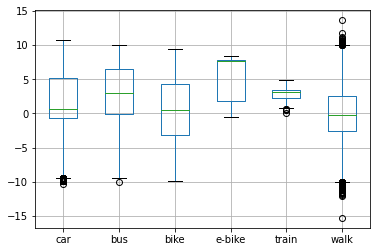

In [279]:
boxplot = df_x_mean.boxplot(column=headers) 

**Box plot for x_std**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


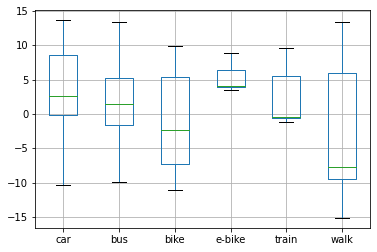

In [280]:
boxplot = df_x_std.boxplot(column=headers) 

**Box plot for x_max**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


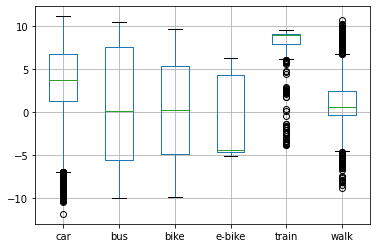

In [281]:
boxplot = df_x_max.boxplot(column=headers) 

**Box plot for x_min**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


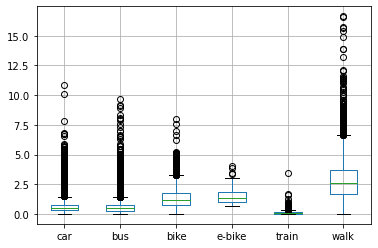

In [282]:
boxplot = df_x_min.boxplot(column=headers) 

**Box plot for y_mean**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


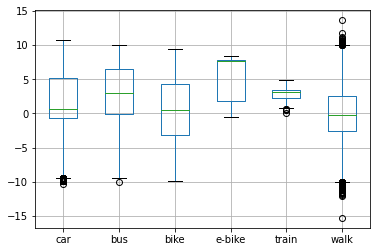

In [283]:
boxplot_y1 = df_y_mean.boxplot(column=headers)

**Box plot for y_std**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


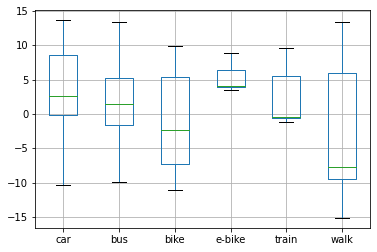

In [284]:
boxplot_y2 = df_y_std.boxplot(column=headers)

**Box plot for y_max**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


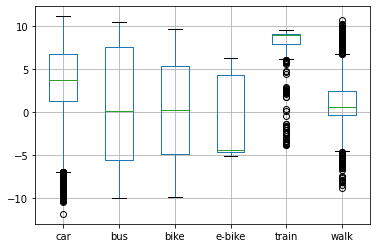

In [285]:
boxplot_y3 = df_y_max.boxplot(column=headers)

**Box plot for y_min**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


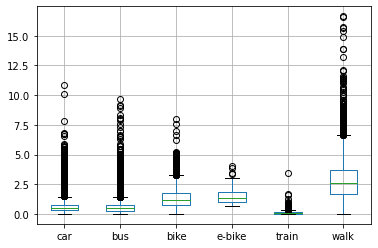

In [286]:
boxplot_y4 = df_y_min.boxplot(column=headers)

**Box plot for z_mean**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


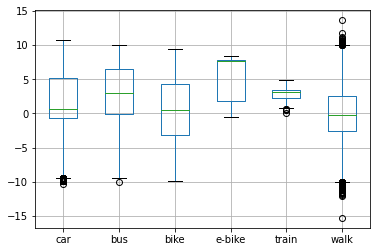

In [287]:
boxplot_z1 = df_z_mean.boxplot(column=headers)

**Box plot for z_std**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


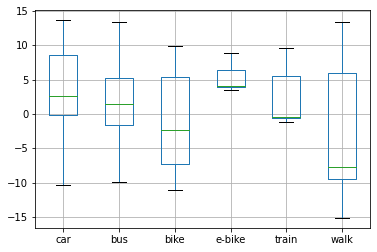

In [288]:
boxplot_z2 = df_z_std.boxplot(column=headers)

**Box plot for z_max**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


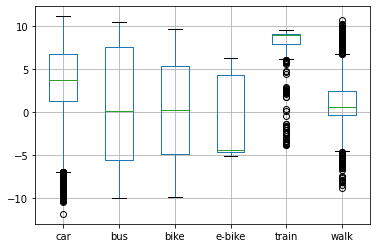

In [289]:
boxplot_z3 = df_z_max.boxplot(column=headers)

**Box plot for z_min**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


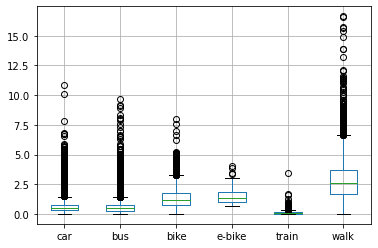

In [290]:
boxplot_z4 = df_z_min.boxplot(column=headers)

##Q5. Balancing The Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


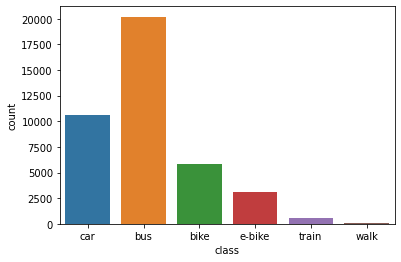

In [297]:
import seaborn as sns
g = sns.countplot(df3['class'])
g.set_xticklabels(['car','bus', 'bike', 'e-bike', 'train', 'walk'])
plt.show()

In [298]:
from imblearn.under_sampling import NearMiss
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
nm = NearMiss()
# x_nm, y_nm = nm.fit_resample(df3.loc[df3['class'] == 'train'], df3.loc[df3['class'] == ''])

In [303]:
df3 = df3.dropna()

**Using the near miss algorithm for undersampling**

In [336]:
d_t = df3.values
X, y = d_t[:, :-1], d_t[:, -1]
y = LabelEncoder().fit_transform(y)
under_samp = NearMiss()
X, y = under_samp.fit_resample(X, y)
count = Counter(y)
for k,v in count.items():
	print('Class=%d, n=%d' % (k, v))

Class=0, n=79
Class=1, n=79
Class=2, n=79
Class=3, n=79
Class=4, n=79
Class=5, n=79


##Q.6 TRAIN TEST SPLIT

**Splitting the dataset firstly into train and test in 80-20. Then splitting train into train and validation in 75-25**

In [305]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [341]:
X_train.shape

(284, 12)

In [342]:
X_val.shape

(95, 12)

In [344]:
X_test.shape

(95, 12)

##Q.7 MODEL IMPLEMENTATION

**Implemented svm, logistic and ANN. Then calculated f1 score for each model**

In [306]:
from sklearn.metrics import f1_score

##SVM

In [331]:
from sklearn import svm
clf = svm.SVC(kernel='linear') 
history = clf.fit(X_train, y_train)

In [308]:
clf.score(X_val, y_val)

0.8210526315789474

In [309]:
y_pred = clf.predict(X_test)

In [310]:
y_pred

array([1, 3, 0, 5, 3, 3, 1, 3, 1, 2, 3, 2, 5, 3, 4, 0, 2, 4, 5, 5, 3, 2,
       2, 0, 1, 5, 5, 3, 4, 5, 3, 0, 2, 1, 0, 4, 3, 2, 4, 0, 1, 0, 5, 3,
       0, 2, 5, 3, 0, 1, 5, 5, 0, 5, 3, 2, 1, 5, 1, 0, 5, 5, 1, 5, 0, 3,
       3, 2, 5, 1, 1, 1, 1, 4, 0, 3, 0, 1, 1, 5, 0, 0, 0, 2, 4, 2, 2, 4,
       2, 0, 5, 0, 1, 1, 0])

In [311]:
y_test

array([2, 3, 0, 5, 3, 3, 2, 3, 1, 2, 3, 2, 4, 3, 4, 0, 2, 4, 4, 5, 3, 2,
       2, 0, 2, 5, 3, 3, 4, 0, 3, 3, 1, 2, 0, 4, 3, 1, 4, 0, 2, 0, 5, 3,
       0, 2, 5, 3, 0, 2, 5, 5, 2, 5, 3, 2, 1, 5, 3, 0, 5, 5, 2, 5, 3, 3,
       3, 1, 5, 1, 1, 1, 1, 4, 5, 3, 3, 1, 1, 5, 0, 5, 0, 2, 5, 2, 2, 5,
       2, 0, 5, 0, 1, 1, 3])

In [312]:
f1_score(y_test, y_pred, average='macro')

0.7430187977851016

##Logistic Regression

In [313]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [314]:
predictions = logisticRegr.predict(X_test)

In [315]:
predictions

array([2, 3, 0, 5, 3, 3, 1, 3, 1, 2, 3, 2, 4, 3, 4, 5, 1, 4, 0, 5, 3, 2,
       2, 0, 1, 5, 5, 3, 4, 0, 3, 0, 2, 1, 0, 4, 3, 2, 4, 0, 1, 0, 5, 3,
       0, 2, 5, 3, 0, 1, 5, 5, 0, 5, 3, 2, 1, 5, 3, 0, 3, 5, 1, 5, 0, 3,
       3, 2, 5, 1, 1, 1, 1, 4, 0, 3, 0, 1, 1, 5, 0, 0, 0, 2, 5, 2, 2, 4,
       2, 0, 5, 0, 2, 1, 0])

In [316]:
y_test

array([2, 3, 0, 5, 3, 3, 2, 3, 1, 2, 3, 2, 4, 3, 4, 0, 2, 4, 4, 5, 3, 2,
       2, 0, 2, 5, 3, 3, 4, 0, 3, 3, 1, 2, 0, 4, 3, 1, 4, 0, 2, 0, 5, 3,
       0, 2, 5, 3, 0, 2, 5, 5, 2, 5, 3, 2, 1, 5, 3, 0, 5, 5, 2, 5, 3, 3,
       3, 1, 5, 1, 1, 1, 1, 4, 5, 3, 3, 1, 1, 5, 0, 5, 0, 2, 5, 2, 2, 5,
       2, 0, 5, 0, 1, 1, 3])

In [317]:
f1_score(y_test, predictions, average='macro')

0.7614898258153837

In [318]:
import tensorflow as tf

In [319]:
df1.head()

,user,timestamp,x,y,z,class,shifted_user,shifted_class,shifted_ts,difference,updated,updated_shift,seq,min_t,t_needed,t_parted,seq_new
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.13,-3.74,bus,NaN,NaN,NaT,NaN,True,NaN,1,2018-06-04 16:26:55,0.0,1#0,NaN
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,2018-06-04 16:26:55,0.0,False,True,1,2018-06-04 16:26:55,0.0,1#0,1.0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,2018-06-04 16:26:55,0.0,False,False,1,2018-06-04 16:26:55,0.0,1#0,1.0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,2018-06-04 16:26:55,0.0,False,False,1,2018-06-04 16:26:55,0.0,1#0,1.0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,2018-06-04 16:26:55,0.0,False,False,1,2018-06-04 16:26:55,0.0,1#0,1.0


In [320]:
df4 = df3.copy()

##ANN

In [328]:
y1_train = y = tf.keras.utils.to_categorical(y_train)
y1_test = y = tf.keras.utils.to_categorical(y_test)

In [350]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.BatchNormalization())
classifier.add(tf.keras.layers.Dense(units=12,activation="ReLU"))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.BatchNormalization())
classifier.add(tf.keras.layers.Dense(units=8,activation="ReLU"))
classifier.add(tf.keras.layers.Dropout(0.1))
classifier.add(tf.keras.layers.BatchNormalization())
classifier.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
classifier.compile(optimizer=adam,loss="categorical_crossentropy",metrics=['accuracy'])
classifier.fit(X_train,y1_train,batch_size = 16,epochs = 250, validation_data=(X_test, y1_test))

Epoch 1/250
18/18 [==============================] - 2s 17ms/step - loss: 1.9561 - accuracy: 0.1725 - val_loss: 2.1222 - val_accuracy: 0.0526
Epoch 2/250
18/18 [==============================] - 0s 4ms/step - loss: 1.8626 - accuracy: 0.2394 - val_loss: 1.9047 - val_accuracy: 0.1368
Epoch 3/250
18/18 [==============================] - 0s 5ms/step - loss: 1.6239 - accuracy: 0.3697 - val_loss: 1.7662 - val_accuracy: 0.2105
Epoch 4/250
18/18 [==============================] - 0s 6ms/step - loss: 1.6105 - accuracy: 0.3838 - val_loss: 1.6769 - val_accuracy: 0.3684
Epoch 5/250
18/18 [==============================] - 0s 5ms/step - loss: 1.5491 - accuracy: 0.3838 - val_loss: 1.6117 - val_accuracy: 0.4421
Epoch 6/250
18/18 [==============================] - 0s 4ms/step - loss: 1.5042 - accuracy: 0.3908 - val_loss: 1.5493 - val_accuracy: 0.4947
Epoch 7/250
18/18 [==============================] - 0s 4ms/step - loss: 1.4039 - accuracy: 0.4261 - val_loss: 1.4968 - val_accuracy: 0.5053
Epoch 8/250


##Conclusion

Based on above f1 score logistic regression comes at top with 0.7614 f1 score followed by ANN then SVM comes.